## Assignment week 05: Sleeping habits

Welcome to **week five** of this course programming 1. You will learn about analysing data with pandas and numpy and you will learn to visualize with bokeh. Concretely, you will preprocess the Sleep Study data in an appropiate format in order to conduct statistical and visual analysis. Learning outcomes:


## About the data

The data is collected from a survey-based study of the sleeping habits of individuals within the US. 

Below is a description of each of the variables contained within the dataset.

- Enough = Do you think that you get enough sleep?
- Hours = On average, how many hours of sleep do you get on a weeknight?
- PhoneReach = Do you sleep with your phone within arms reach?
- PhoneTime = Do you use your phone within 30 minutes of falling asleep?
- Tired = On a scale from 1 to 5, how tired are you throughout the day? (1 being not tired, 5 being very tired)
- Breakfast = Do you typically eat breakfast?

The two research questions you should answer in this assignment are:
1. Is there a differences in Hours sleep caused by having breakfast (yes, no)?
2. Is there a differences in Hours sleep caused by having breakfast and the tireness (score)


The assignment consists of 6 parts:

- [part 1: load the data](#0)
- [part 2: data inspection](#1)
- [part 3: check assumptions](#2)
   - [check normality 3.1](#ex-31)
   - [check equal variance 3.2](#ex-32)
- [part 4: prepare the data](#3)
- [part 5: answer the research question](#4)
- [part 6: enhanced plotting](#5)

Part 1 till 5 are mandatory, part 6 is optional (bonus)
To pass the assingnment you need to a score of 60%. 


**NOTE If your project data is suitable you can use that data instead of the given data**

## ANOVA

Analysis of variance (ANOVA) compares the variances between groups versus within groups. It basically determines whether the differences between groups is larger than the differences within a group (the noise). 
A graph picturing this is as follow: https://link.springer.com/article/10.1007/s00424-019-02300-4/figures/2


In ANOVA, the dependent variable must be a continuous (interval or ratio) level of measurement. For instance Glucose level. The independent variables in ANOVA must be categorical (nominal or ordinal) variables. For instance trial category, time of day (AM versus PM) or time of trial (different categories). Like the t-test, ANOVA is also a parametric test and has some assumptions. ANOVA assumes that the data is normally distributed.  The ANOVA also assumes homogeneity of variance, which means that the variance among the groups should be approximately equal. ANOVA also assumes that the observations are independent of each other. 

A one-way ANOVA has just one independent variable. A two-way ANOVA (are also called factorial ANOVA) refers to an ANOVA using two independent variables. For research question 1 we can use the one-way ANOVA, for research question two we can use two-way ANOVA. But first we need to check the assumptions. 


---

In [3]:
!pip install pandas

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import bokeh

ModuleNotFoundError: No module named 'pandas.compat'

<a name='0'></a>
## Part 1: Load the data (10 pt)

load the `sleep.csv` data. Get yourself familiar with the data. Answer the following questions.

1. What is the percentage missing data?
2. Considering the research question, what is the dependent variable and what are the indepent variables? Are they of the correct datatype? 

In [1]:
#code printing percentage missing data

In [2]:
#code printing answer dependent and independent variables

In [3]:
#code printing answer about datatypes

In [71]:
df = pd.read_csv("../data/sleep.csv")

In [72]:
df.head()

,Enough,Hours,PhoneReach,PhoneTime,Tired,Breakfast
0,Yes,8.0,Yes,Yes,3,Yes
1,No,6.0,Yes,Yes,3,No
2,Yes,6.0,Yes,Yes,2,Yes
3,No,7.0,Yes,Yes,4,No
4,No,7.0,Yes,Yes,2,Yes


In [73]:
df.shape

(104, 6)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 6 columns):
Enough        104 non-null object
Hours         102 non-null float64
PhoneReach    104 non-null object
PhoneTime     104 non-null object
Tired         104 non-null int64
Breakfast     104 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 5.0+ KB


In [75]:
# Percentage of missing data in our dataframe.
# As it is shown we have only 2% of missing data in HOURS column.
# So, we will eliminate those rows with missing data

print("% of missing values Before droping NANs: ", df.isnull().sum()/df.shape[0] * 100)
df = df.dropna()
print("\nshape of DF after droping missing values: ", df.shape)

% of missing values Before droping NANs:  Enough        0.000000
Hours         1.923077
PhoneReach    0.000000
PhoneTime     0.000000
Tired         0.000000
Breakfast     0.000000
dtype: float64

shape of DF after droping missing values:  (102, 6)


In [77]:
# Printing types data in DF
# type casting of Breakfast and Tired columns to category type.

print("Types of data:\n", df.dtypes)
df['Breakfast'] = df['Breakfast'].astype('category')
df['Tired'] = df['Tired'].astype('category')

print("\nTypes of data after modification:\n", df.dtypes)

print("\nIndependent and dependant variables are df['Breakfast'] and df['Hours'] in the right format")

Types of data:
 Enough          object
Hours          float64
PhoneReach      object
PhoneTime       object
Tired         category
Breakfast     category
dtype: object

Types of data after modification:
 Enough          object
Hours          float64
PhoneReach      object
PhoneTime       object
Tired         category
Breakfast     category
dtype: object

Independent and dependant variables are df['Breakfast'] and df['Hours'] in the right format


---

<a name='1'></a>
## Part 2: Inspect the data (30 pt)

Inspect the data practically. Get an idea about how well the variable categories are ballanced. Are the values of a variable equally divided? What is the mean value of the dependent variable? Are there correlations amongs the variables?


<ul>
<li>Create some meaninful overviews such as variable value counts</li>
<li>Create a scatter plot ploting the relation between being tired and hours of sleep with different colors for Breakfast</li>
    <li>Print some basic statistics about the target (mean, standard deviation)</li>
    <li>Create a heatmap to check for correlations among variables. </li>

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
    <ul><li>the gitbook has a bokeh heatmap example</li></ul>
</details>
</ul>

In [4]:
#code your answer to the value counts and distribution plots here

In [5]:
#code for the scatter plot here

In [6]:
#code your answer to the target statistics here

In [7]:
#code your answer for the heatmap here and briefly state your finding

In [32]:
# for printing values counts we can briefly use following command.
# I filled NAN values with Zero.

df.apply(pd.value_counts).fillna(0)

/usr/lib/python3/dist-packages/pandas/core/indexes/api.py:107: RuntimeWarning: '<' not supported between instances of 'str' and 'float', sort order is undefined for incomparable objects
  result = result.union(other)
/usr/lib/python3/dist-packages/pandas/core/frame.py:7397: RuntimeWarning: '<' not supported between instances of 'float' and 'str', sort order is undefined for incomparable objects
  index = _union_indexes(indexes)
/usr/lib/python3/dist-packages/pandas/core/indexes/api.py:107: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)
/usr/lib/python3/dist-packages/pandas/core/indexes/api.py:107: RuntimeWarning: '<' not supported between instances of 'float' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)


,Enough,Hours,PhoneReach,PhoneTime,Tired,Breakfast
No,67.0,0.0,31.0,19.0,0.0,41.0
Yes,35.0,0.0,71.0,83.0,0.0,61.0
7.0,0.0,35.0,0.0,0.0,0.0,0.0
6.0,0.0,24.0,0.0,0.0,0.0,0.0
8.0,0.0,16.0,0.0,0.0,0.0,0.0
5.0,0.0,12.0,0.0,0.0,10.0,0.0
9.0,0.0,8.0,0.0,0.0,0.0,0.0
4.0,0.0,4.0,0.0,0.0,23.0,0.0
2.0,0.0,2.0,0.0,0.0,26.0,0.0
10.0,0.0,1.0,0.0,0.0,0.0,0.0


In [66]:
# Distribution plots of dataframe colomns
#plt.plot(df.index, df['Breakfast'])
#for c in df.columns:

In [38]:
#!pip3 install pandas_profiling
#import pandas_profiling
#df.profile_report()

ModuleNotFoundError: No module named 'pandas_profiling'

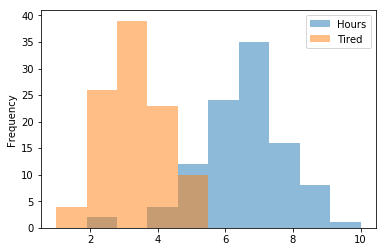

In [67]:
df.plot.hist(alpha=0.5)

---

<a name='2'></a>
## Part 3: Check Assumptions

Before we answer the research question with ANOVA we need to check the following assumptions:

1. ANOVA assumes that the dependent variable is normaly distributed
2. ANOVA also assumes homogeneity of variance
3. ANOVA also assumes that the observations are independent of each other. Most of the time we need domain knowledge and experiment setup descriptions to estimate this assumption

We are going to do this graphically and statistically. 

<a name='ex-31'></a>
### Check normality (10 pt)

<ul><li>
Plot the distribution of the dependent variable. Add a vertical line at the position of the average. Add a vertical line for the robuust estimation. Add the normal distribution line to the plot. Comment on the normallity of the data. Do you want the full points? Plot with bokeh!</li>

<li>Use a Shapiro-Wilk Test or an Anderson-Darling test to check statistically</li></ul>


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
    <ul><li>check the code of lesson 1 DS1 bayesian statistics</li>
        <li>heart_failure case of gitbook uses bokeh histograms</li>
</ul>
</details>

In [8]:
# your code to plot here

In [9]:
# briefly summarize your findings

<a name='ex-32'></a>
### Check homogeneity of variance (20 pt)

<ul><li>
Use boxplots for the check of homoegeneity of variance. Do you want the full points? Plot with bokeh!</li>

<li>Use a Levene’s & Bartlett’s Test of Equality (Homogeneity) of Variance to test equal variance statistically</li><ul>

In [10]:
# your code to plot here

In [11]:
# your code for the statistical test here

In [12]:
# briefly summarize your findings

---

<a name='3'></a>
## Part 4: Prepare your data (10 pt)

Create a dataframe with equal samplesize. Make three categories for tireness 1-2 = no, 3 = maybe, 4-5 = yes

In [13]:
#your solution here

---

<a name='4'></a>
## Part 5: Answer the research questions (20 pt)

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
    <ul><li>use one-way ANOVA for research question 1</li>
    <li>Use two-way ANOVA for research question 2</li>
    <li>https://reneshbedre.github.io/blog/anova.html</li>
</ul>
</details>

In [14]:
#Your solution here

---

<a name='5'></a>
## Part 6: Enhanced plotting (20 pt)

Create a panel with 1) your dataframe with equal samplesize 2) a picture of a sleeping beauty, 3) the scatter plot of tired / hours of sleep with different colors for Breakfast from part 2 4) the boxplots given the p-value for the anova outcome in the title

In [15]:
#your solution here